In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def normalize(X):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    mu = np.mean(X, axis=0) # <-- EDIT THIS, compute the mean of X
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = (X - mu) / std_filled                 # <-- EDIT THIS, compute the normalized data Xbar
    return Xbar, mu, std

def eig(S):
    """Compute the eigenvalues and corresponding eigenvectors 
        for the covariance matrix S.
    Args:
        S: ndarray, covariance matrix
    
    Returns:
        (eigvals, eigvecs): ndarray, the eigenvalues and eigenvectors

    Note:
        the eigenvals and eigenvecs should be sorted in descending
        order of the eigen values
    """
    eigvals, eigvecs = np.linalg.eig(S)
    idx_sorted = np.argsort(eigvals)[::-1]
    return (eigvals[idx_sorted], eigvecs[:,idx_sorted]) # <-- EDIT THIS to return the eigenvalues and corresponding eigenvectors

def projection_matrix(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    return B @  np.linalg.inv(B.T @ B) @ B.T # <-- EDIT THIS to compute the projection matrix
    #return B  @ B.T
def PCA(X, num_components):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
           and N is the number of datapoints
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
    """
    # your solution should take advantage of the functions you have implemented above.
    S = np.cov(X.T)
    eigvals, eigvecs = eig(S)
    P = projection_matrix(eigvecs[:, :num_components])
    
    return (P @ X.T).T # <-- EDIT THIS to return the reconstruction of X

In [3]:
def plot_dataPoints(X):
    plt.figure(figsize=(10,10))
    plt.scatter(X[:,0], X[:,1])
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.axis('equal')


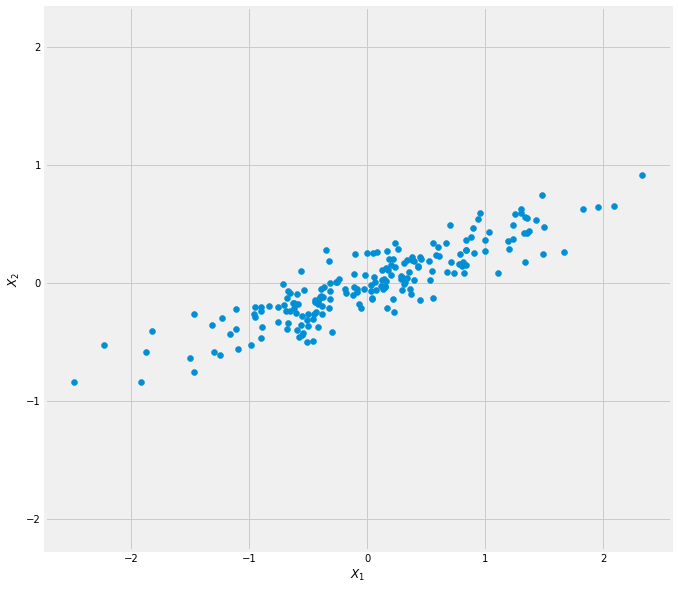

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plot_dataPoints(X)

In [5]:
print('data shape is {}'.format(X.shape))
print('data dimensions is {}'.format(X.shape[1]))

data shape is (200, 2)
data dimensions is 2


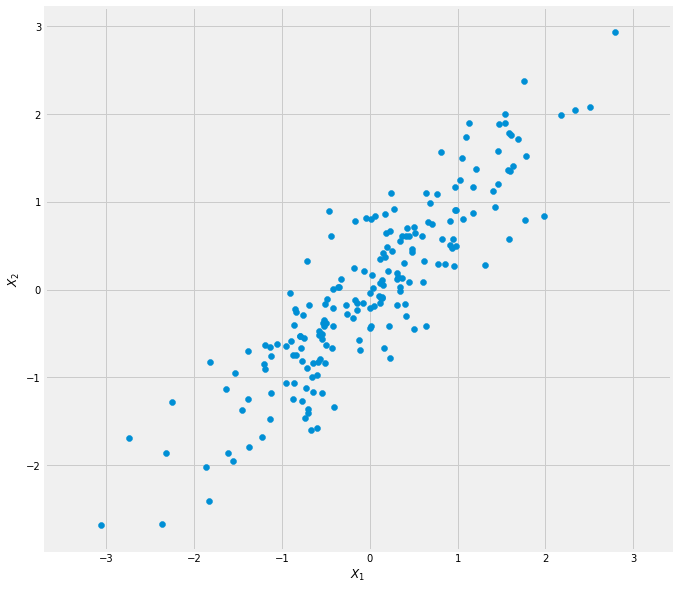

In [6]:
Xbar,mean, std = normalize(X)
plot_dataPoints(Xbar)

In [7]:
# getting the components 
cov_mat = np.cov(Xbar.T)
eigvals, eigvects = eig(cov_mat) # pca_components
print(eigvects)
eigvects[:,0].reshape(-1, 1) @ eigvects[:,0].reshape(-1, 1).T 

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


array([[0.5, 0.5],
       [0.5, 0.5]])

In [8]:
# explained_variance__
total = np.sum(eigvals)
var_exp = [(i/total) for i in eigvals]
print(var_exp)
print(eigvals)

[0.9446949770005366, 0.05530502299946346]
[1.89888438 0.11116588]


1.898884375880475
[-0.70710678 -0.70710678]
0.11116587537580591
[-0.70710678  0.70710678]


(-3.3586769046864884,
 3.0843383509962727,
 -2.967078415921871,
 3.2220531837898254)

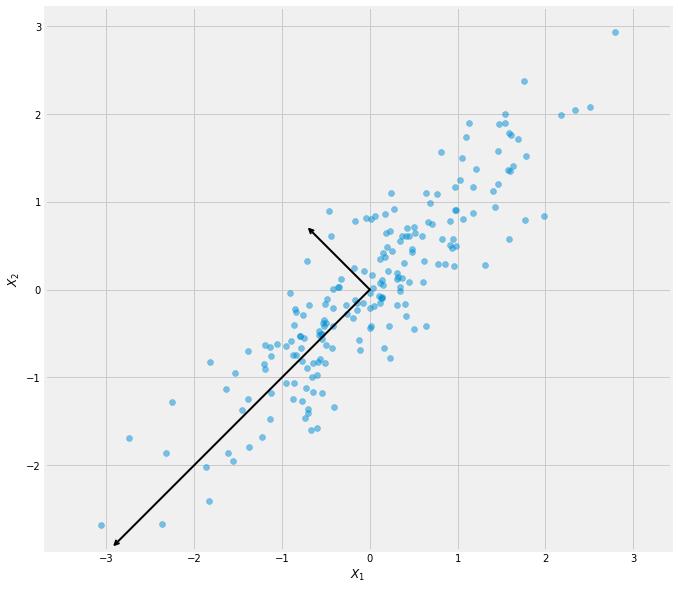

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot normalize data 
plt.figure(figsize=(10,10))

plt.scatter(Xbar[:, 0], Xbar[:, 1], alpha=0.5)
for length, vector in zip(eigvals, eigvects):
    print(length)
    print(vector)
    v = vector * 3 * np.sqrt(length)
    draw_vector(np.array([0.0,0.0]), np.array([0.0,0.0])+v)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('equal')

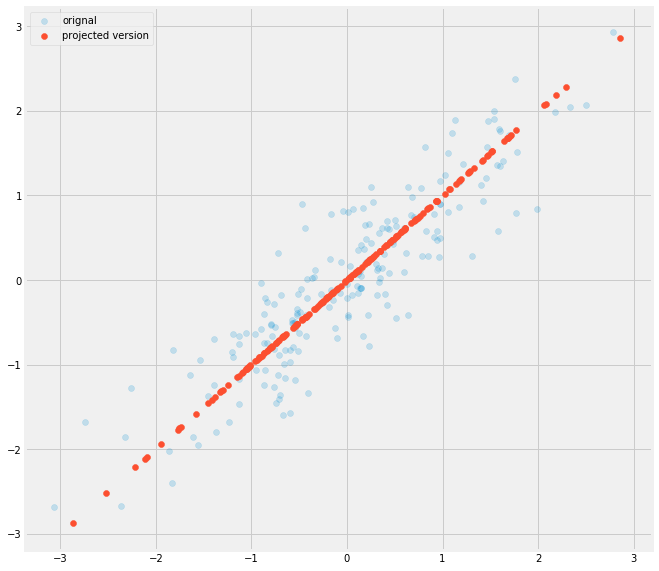

In [10]:
X_pca = PCA(Xbar, num_components=1)

plt.figure(figsize=(10,10))
plt.scatter(Xbar[:,0], Xbar[:,1], alpha=0.2, label='orignal')
plt.scatter(X_pca[:,0], X_pca[:,1], label='projected version')
plt.legend(loc='best')

(-4.4565426480605845,
 4.4702349123249485,
 -0.9071799075323628,
 1.0622611890469629)

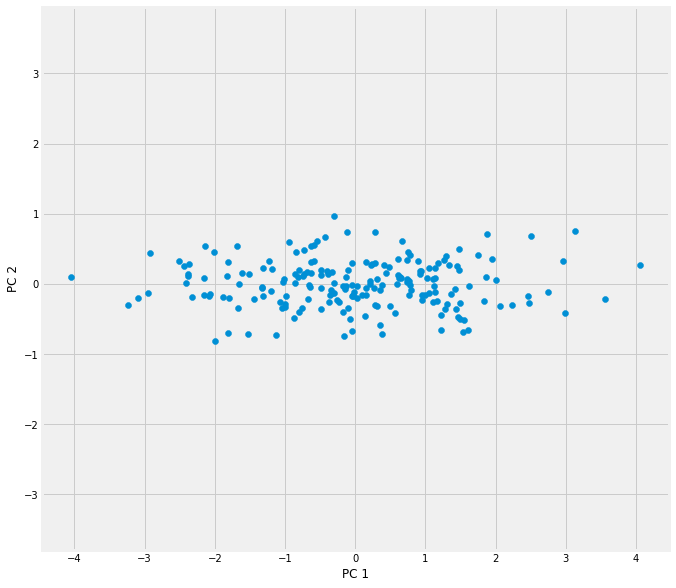

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_proj = pca.fit_transform(Xbar) 

plt.figure(figsize=(10,10))
plt.scatter(X_proj[:,0], X_proj[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')

## PCA for visualization: Hand-written digits


In [12]:
from sklearn.datasets import load_digits
from ipywidgets import interact
digits = load_digits()
print('data shape is {}'.format(digits.data.shape))
print('data dimensions is {}'.format(digits.data.shape[1])) # the data set consist of 8x8 pixel images, meaning that  they are 64-dimensional.

data shape is (1797, 64)
data dimensions is 64


In [13]:
# It is a good tip visualize how the data looks like
@interact(i=(0,10))
def show_hand_written_digit(i):
    d = digits.data[i:i+5].reshape(-1,8,8)
    plt.figure(figsize=(10,10))
    plt.imshow(np.hstack(d), cmap='gray')
    plt.show()
    

interactive(children=(IntSlider(value=5, description='i', max=10), Output()), _dom_classes=('widget-interact',…

In [14]:
pca = PCA(n_components=2) # project form 64 to 2 principal components (PC)
projected_digits = pca.fit_transform(digits.data)
print('Projected data shape is {}'.format(projected_digits.shape))
print('Explained variance: {}'.format(pca.explained_variance_))

Projected data shape is (1797, 2)
Explained variance: [179.0069301  163.71774688]


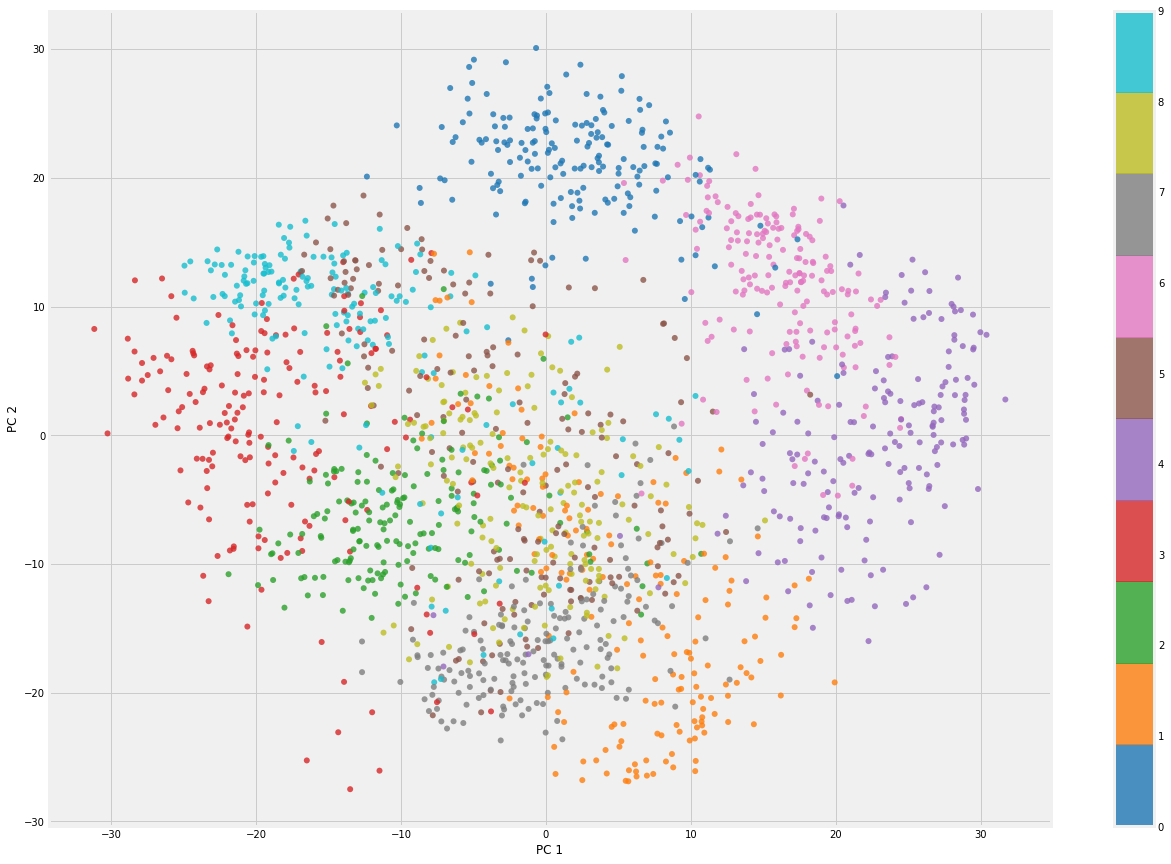

In [15]:
#Now we cant to visualize the first two principal components
plt.figure(figsize=(20,15))
plt.scatter(projected_digits[:,0], projected_digits[:,1],
           c=digits.target, edgecolors='none', alpha=0.8,
           cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar();

# Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be
determined by looking at the cumulative variance ratio as a function of the number of componnets 

Text(0, 0.5, 'Cumulative Explained Variance')

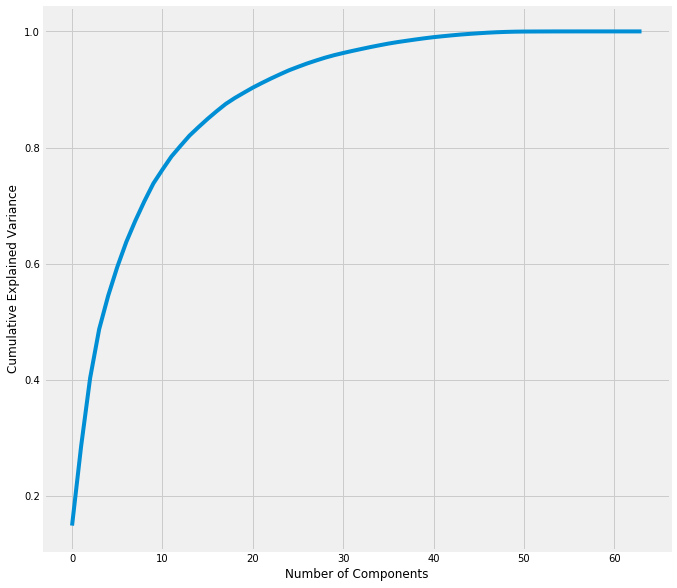

In [16]:
pca = PCA().fit(digits.data)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# PCA as Noise Filtering 

PCA can also be used as a filtering approach for noisy data. The idea is this any componets with variance much larger than the efect of the noise should be relatively unaffected by the noise. So if you reconstruct the data usgin just the largest subset of PC, you should be preferentially kepping the signal and throwing out the noise




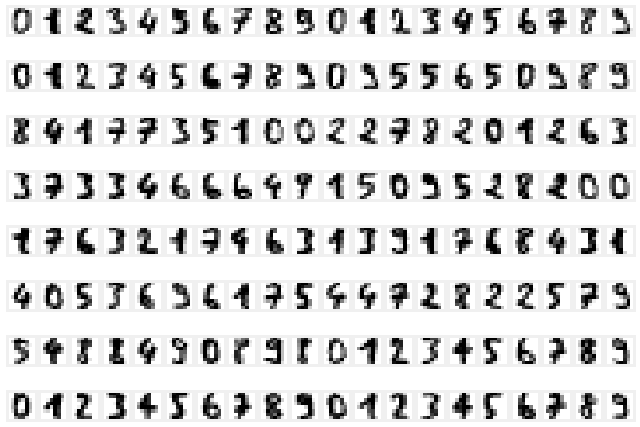

In [17]:
def plot_digits(data):
    fig, axes = plt.subplots(8, 20, figsize=(10, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

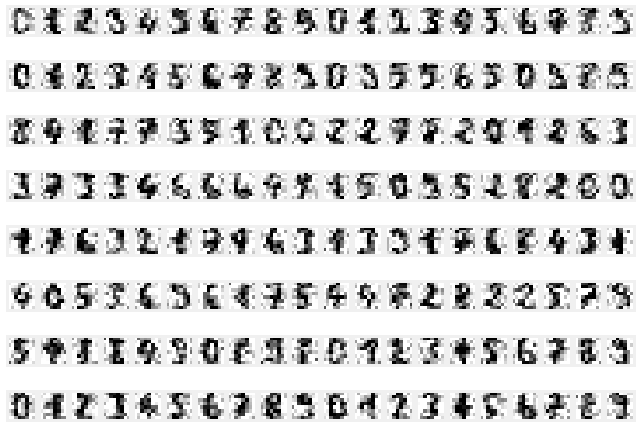

In [18]:
#let add some noise to create a noisy dataset
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [19]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

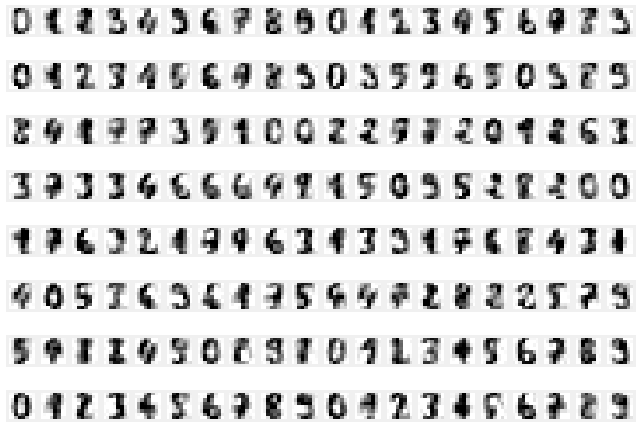

In [20]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [21]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [22]:
pca = PCA(n_components=150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

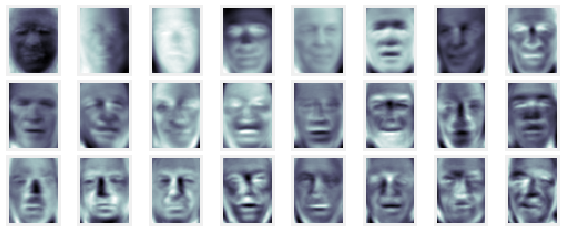

In [23]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

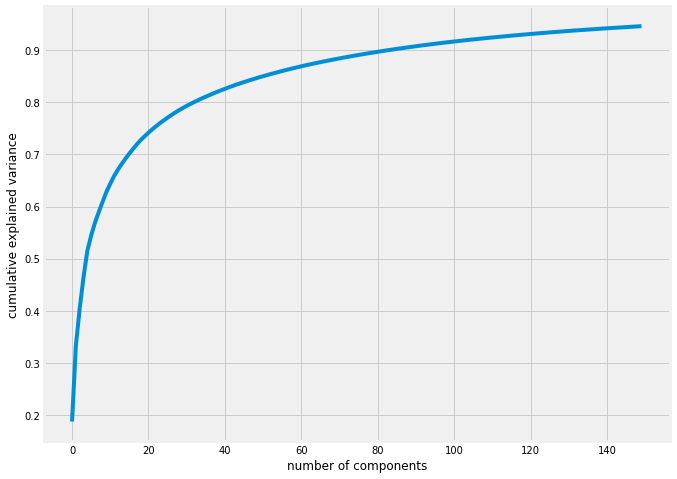

In [24]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
# Compute the components and projected faces
pca =PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

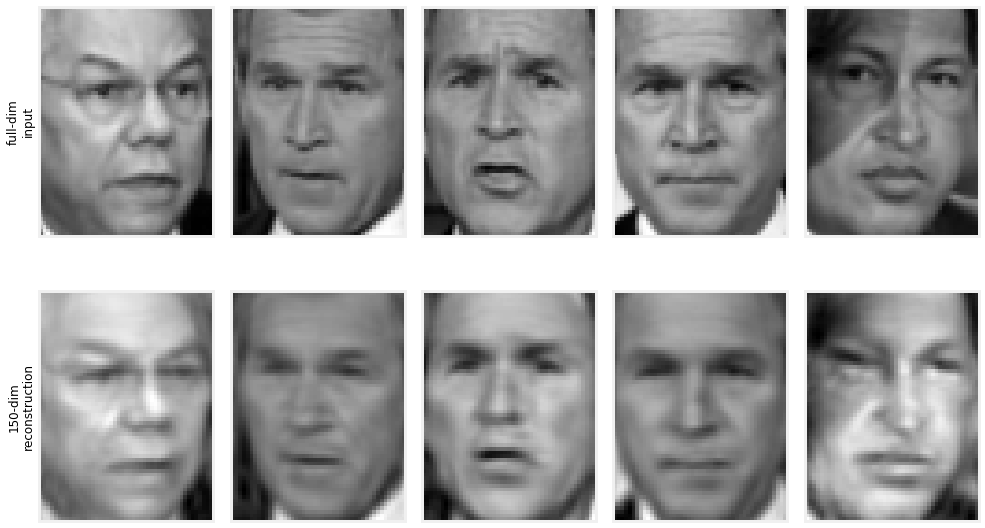

In [26]:
# Plot the results
fig, ax = plt.subplots(2, 5, figsize=(15, 10),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. 